# Algo-trading: data preparation


> Author: <b>Nicola Bini</b>
>
> Date:   <b>06/17/2021</b>
>
>
> <b>Team 2:</b>
> <i>
> <br>Nicola Bini
> <br>Felipe Domingues
> <br>Tri Dung Dinh
> <br>Manuel Echazarra
> </i>

# Summary

This is a Keras LSTM model to predict whether or not the stock will close at higher price compared to the closing
price of the previous day.
Its predictions are then saved in a csv file as a signal for the bt library.

In [52]:
# Algo-trading: data preparation


> Author: <b>Nicola Bini</b>
>
> Date:   <b>06/17/2021</b>
>
>
> <b>Team 2:</b>
> <i>
> <br>Nicola Bini
> <br>Felipe Domingues
> <br>Tri Dung Dinh
> <br>Manuel Echazarra
> </i>

# Summary

This is a Keras LSTM model to predict whether or not the stock will close at higher price compared to the closing
price of the previous day.
Its predictions are then saved in a csv file as a signal for the bt library.### Import libraries ###
from keras.models import Sequential       # Sequential model
from keras.layers import Dense            # Dense layer
from keras.layers import LSTM             # LSTM layer
from keras.layers import Dropout          # Dropout layer
#from tensorflow   import set_random_seed  # set random seed

import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt

# Set random seed for reproducible results
np.random.seed(42)

In [53]:
# Load data
data = pd.read_csv("./final_data.csv")
data = data.rename(columns = {"Unnamed: 0":"date"})
data = data.set_index("date")
data

,DNN,HGEN,ICLN,OCGN,VGT,VUZI,XLV,^NBI,price%_DNN,price%_HGEN,...,sma_XLV,sma_^NBI,profit_DNN,profit_HGEN,profit_ICLN,profit_OCGN,profit_VGT,profit_VUZI,profit_XLV,profit_^NBI
date,,,,,,,,,,,,,,,,,,,,,
2015-09-18,0.44,15.600000,9.390000,357.000000,102.790001,5.150000,70.910004,3732.669922,0.000000,-0.031056,...,1.014546,1.053607,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
2015-09-21,0.42,14.300000,9.410000,342.600006,103.639999,4.880000,69.970001,3568.250000,-0.045455,-0.083333,...,1.013110,1.051290,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2015-09-22,0.42,13.200000,9.200000,315.000000,102.019997,4.780000,69.540001,3508.300049,0.000000,-0.076923,...,1.011404,1.048319,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
2015-09-23,0.41,13.700000,9.060000,298.200012,101.180000,4.780000,69.470001,3488.520020,-0.023810,0.037879,...,1.009513,1.044806,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
2015-09-24,0.41,12.150000,9.020000,282.000000,101.080002,5.230000,68.760002,3418.729980,0.000000,-0.113139,...,1.007465,1.040933,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-02,1.26,19.360001,22.500000,9.455000,372.720001,19.990000,121.330002,4749.950195,-0.045455,0.039184,...,1.067943,1.019637,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2021-06-03,1.28,18.240000,22.090000,8.890000,368.730011,18.870001,121.699997,4744.620117,0.015873,-0.057851,...,1.068541,1.019038,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2021-06-04,1.37,18.580000,22.299999,8.720000,375.700012,18.730000,122.089996,4803.450195,0.070313,0.018640,...,1.069211,1.019199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# DNN and ICLN Energy
# OCGN and ^NBI Biotechonlogy
# HGEN and XLV Healthcare
# VUZI and VGT Vision 

ticket     = 'VUZI'
index_fund = 'VGT'

lookback = 15 # Days
split_date = '2018-06-01' # Data goes from '2015-09-18' to '2021-06-08'

drop_columns = ["profit_" + index_fund,ticket,index_fund]
for col in data.columns:
    #print(col)
     if ticket not in col and index_fund not in col:
            drop_columns.append(col)

        
df_data = data.drop(drop_columns, axis=1)

df_train = df_data[df_data.index < split_date]
df_test  = df_data[df_data.index > split_date]

train_date = df_train.reset_index()
train_date = train_date['date']
train_date
test_date = df_test.reset_index()
test_date = test_date['date']
test_date

0      2018-06-04
1      2018-06-05
2      2018-06-06
3      2018-06-07
4      2018-06-08
          ...    
754    2021-06-02
755    2021-06-03
756    2021-06-04
757    2021-06-07
758    2021-06-08
Name: date, Length: 759, dtype: object

In [55]:
drop_columns

['profit_VGT',
 'VUZI',
 'VGT',
 'DNN',
 'HGEN',
 'ICLN',
 'OCGN',
 'XLV',
 '^NBI',
 'price%_DNN',
 'price%_HGEN',
 'price%_ICLN',
 'price%_OCGN',
 'price%_XLV',
 'price%_^NBI',
 'RSI_DNN',
 'RSI_HGEN',
 'RSI_ICLN',
 'RSI_OCGN',
 'RSI_XLV',
 'RSI_^NBI',
 'sma_DNN',
 'sma_HGEN',
 'sma_ICLN',
 'sma_OCGN',
 'sma_XLV',
 'sma_^NBI',
 'profit_DNN',
 'profit_HGEN',
 'profit_ICLN',
 'profit_OCGN',
 'profit_XLV',
 'profit_^NBI']

In [56]:
x_train = df_train.drop(["profit_" + ticket], axis=1)
y_train = df_train['profit_' + ticket]

x_test = df_test.drop(["profit_" + ticket], axis=1)
y_test = df_test['profit_' + ticket]

In [57]:
def create_dataset_with_lookback(data, lookback):
    
    data = np.array(data)
    
    data_w_timesteps = np.zeros((data.shape[0]-lookback, lookback, data.shape[1]), dtype=np.float)
    #print("data_w_timesteps shape: ", data_w_timesteps.shape)
    
    for i in range(data_w_timesteps.shape[0]):
        for i2 in range(10):
            data_w_timesteps[i][i2] = data[i + i2]
    
    return data_w_timesteps
    
# Data with time steps
x_train_tm = create_dataset_with_lookback(x_train, lookback)
x_test_tm = create_dataset_with_lookback(x_test, lookback)

In [58]:
train_date = train_date.tail(y_train.shape[0]-lookback-1)
test_date  = test_date.tail(y_test.shape[0]-lookback)

x_train    = x_train[1:]
y_train_tm = y_train.tail(y_train.shape[0]-lookback-1)
y_test_tm  = y_test.tail(y_test.shape[0]-lookback)

x_train_tm = create_dataset_with_lookback(x_train, lookback)
x_test_tm = create_dataset_with_lookback(x_test, lookback)

In [59]:
print("x_train shape: ", x_train_tm.shape)
print("y_train shape: ", y_train_tm.shape)
print("x_test shape: ",  x_test_tm.shape)
print("y_test shape: ",  y_test_tm.shape)

x_train shape:  (664, 15, 6)
y_train shape:  (664,)
x_test shape:  (744, 15, 6)
y_test shape:  (744,)


In [60]:
y_train_tm.value_counts()

0.0    350
1.0    314
Name: profit_VUZI, dtype: int64

In [10]:
### LSTM model ###

model = Sequential()

model.add(LSTM(units = 250, return_sequences = True, input_shape=(lookback, x_train_tm.shape[2])))
#model.add(Dropout(0.2))

model.add(LSTM(units = 250, return_sequences = True))
#model.add(Dropout(0.2))

model.add(LSTM(units = 250, return_sequences = True))
#model.add(Dropout(0.2))

model.add(Dense(units = 50))
#model.add(Dropout(0.2))

model.add(Dense(units = 1, activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

#model.build()
history = model.fit(x_train_tm, 
                    y_train_tm,
                    epochs           = 100, 
                    batch_size       = 16,
                    shuffle          = True,
                    validation_split = 0.2,
                    verbose          = 1)

Epoch 1/500
32/32 [==============================] - 53s 419ms/step - loss: 0.7268 - accuracy: 0.4776 - val_loss: 0.6930 - val_accuracy: 0.4984
Epoch 2/500
32/32 [==============================] - 3s 110ms/step - loss: 0.6935 - accuracy: 0.5463 - val_loss: 0.6922 - val_accuracy: 0.5241
Epoch 3/500
32/32 [==============================] - 4s 114ms/step - loss: 0.6942 - accuracy: 0.5143 - val_loss: 0.6925 - val_accuracy: 0.5241
Epoch 4/500
32/32 [==============================] - 4s 113ms/step - loss: 0.6924 - accuracy: 0.5281 - val_loss: 0.6919 - val_accuracy: 0.5241
Epoch 5/500
32/32 [==============================] - 4s 111ms/step - loss: 0.6916 - accuracy: 0.5276 - val_loss: 0.6914 - val_accuracy: 0.5301
Epoch 6/500
32/32 [==============================] - 3s 109ms/step - loss: 0.6944 - accuracy: 0.5257 - val_loss: 0.6918 - val_accuracy: 0.5241
Epoch 7/500
32/32 [==============================] - 3s 110ms/step - loss: 0.6924 - accuracy: 0.5281 - val_loss: 0.6916 - val_accuracy: 0.524

Epoch 58/500
32/32 [==============================] - 3s 105ms/step - loss: 0.6920 - accuracy: 0.5269 - val_loss: 0.6916 - val_accuracy: 0.5241
Epoch 59/500
32/32 [==============================] - 3s 109ms/step - loss: 0.6931 - accuracy: 0.5253 - val_loss: 0.6919 - val_accuracy: 0.5241
Epoch 60/500
32/32 [==============================] - 3s 105ms/step - loss: 0.6916 - accuracy: 0.5281 - val_loss: 0.6918 - val_accuracy: 0.5241
Epoch 61/500
32/32 [==============================] - 4s 126ms/step - loss: 0.6923 - accuracy: 0.5281 - val_loss: 0.6920 - val_accuracy: 0.5241
Epoch 62/500
32/32 [==============================] - 672s 22s/step - loss: 0.6921 - accuracy: 0.5281 - val_loss: 0.6918 - val_accuracy: 0.5241
Epoch 63/500
32/32 [==============================] - 4s 133ms/step - loss: 0.6915 - accuracy: 0.5281 - val_loss: 0.6916 - val_accuracy: 0.5241
Epoch 64/500
32/32 [==============================] - 4s 118ms/step - loss: 0.6925 - accuracy: 0.5203 - val_loss: 0.6920 - val_accuracy:

Epoch 115/500
32/32 [==============================] - 3s 109ms/step - loss: 0.6920 - accuracy: 0.5281 - val_loss: 0.6921 - val_accuracy: 0.5241
Epoch 116/500
32/32 [==============================] - 4s 112ms/step - loss: 0.6924 - accuracy: 0.5281 - val_loss: 0.6920 - val_accuracy: 0.5241
Epoch 117/500
32/32 [==============================] - 4s 111ms/step - loss: 0.6917 - accuracy: 0.5281 - val_loss: 0.6920 - val_accuracy: 0.5241
Epoch 118/500
32/32 [==============================] - 4s 112ms/step - loss: 0.6918 - accuracy: 0.5281 - val_loss: 0.6920 - val_accuracy: 0.5241
Epoch 119/500
32/32 [==============================] - 3s 106ms/step - loss: 0.6918 - accuracy: 0.5281 - val_loss: 0.6920 - val_accuracy: 0.5241
Epoch 120/500
32/32 [==============================] - 4s 109ms/step - loss: 0.6917 - accuracy: 0.5281 - val_loss: 0.6920 - val_accuracy: 0.5241
Epoch 121/500
32/32 [==============================] - 4s 111ms/step - loss: 0.6917 - accuracy: 0.5281 - val_loss: 0.6920 - val_ac

32/32 [==============================] - 4s 115ms/step - loss: 0.6871 - accuracy: 0.5486 - val_loss: 0.6950 - val_accuracy: 0.5048
Epoch 228/500
32/32 [==============================] - 4s 116ms/step - loss: 0.6900 - accuracy: 0.5299 - val_loss: 0.6927 - val_accuracy: 0.5129
Epoch 229/500
32/32 [==============================] - 4s 114ms/step - loss: 0.6880 - accuracy: 0.5459 - val_loss: 0.6949 - val_accuracy: 0.4871
Epoch 230/500
32/32 [==============================] - 4s 115ms/step - loss: 0.6919 - accuracy: 0.5116 - val_loss: 0.6921 - val_accuracy: 0.5076
Epoch 231/500
32/32 [==============================] - 4s 112ms/step - loss: 0.6889 - accuracy: 0.5375 - val_loss: 0.6922 - val_accuracy: 0.5205
Epoch 232/500
32/32 [==============================] - 4s 114ms/step - loss: 0.6874 - accuracy: 0.5470 - val_loss: 0.6928 - val_accuracy: 0.5217
Epoch 233/500
32/32 [==============================] - 4s 113ms/step - loss: 0.6873 - accuracy: 0.5554 - val_loss: 0.6929 - val_accuracy: 0.5193

32/32 [==============================] - 3s 109ms/step - loss: 0.6776 - accuracy: 0.5720 - val_loss: 0.7062 - val_accuracy: 0.5120
Epoch 340/500
32/32 [==============================] - 4s 113ms/step - loss: 0.6784 - accuracy: 0.5697 - val_loss: 0.7091 - val_accuracy: 0.4996
Epoch 341/500
32/32 [==============================] - 3s 109ms/step - loss: 0.6738 - accuracy: 0.5752 - val_loss: 0.7134 - val_accuracy: 0.4996
Epoch 342/500
32/32 [==============================] - 4s 112ms/step - loss: 0.6766 - accuracy: 0.5759 - val_loss: 0.7061 - val_accuracy: 0.5233
Epoch 343/500
32/32 [==============================] - 3s 110ms/step - loss: 0.6763 - accuracy: 0.5712 - val_loss: 0.7019 - val_accuracy: 0.5084
Epoch 344/500
32/32 [==============================] - 4s 112ms/step - loss: 0.6774 - accuracy: 0.5704 - val_loss: 0.7040 - val_accuracy: 0.5076
Epoch 345/500
32/32 [==============================] - 3s 111ms/step - loss: 0.6725 - accuracy: 0.5672 - val_loss: 0.7012 - val_accuracy: 0.5205

Epoch 452/500
32/32 [==============================] - 1s 35ms/step - loss: 0.5366 - accuracy: 0.6837 - val_loss: 0.9441 - val_accuracy: 0.5028
Epoch 453/500
32/32 [==============================] - 1s 34ms/step - loss: 0.5419 - accuracy: 0.6784 - val_loss: 1.0329 - val_accuracy: 0.4952
Epoch 454/500
32/32 [==============================] - 1s 35ms/step - loss: 0.5506 - accuracy: 0.6705 - val_loss: 0.9887 - val_accuracy: 0.5040
Epoch 455/500
32/32 [==============================] - 1s 35ms/step - loss: 0.5522 - accuracy: 0.6843 - val_loss: 0.9783 - val_accuracy: 0.4859
Epoch 456/500
32/32 [==============================] - 1s 37ms/step - loss: 0.5322 - accuracy: 0.6801 - val_loss: 0.9598 - val_accuracy: 0.5076
Epoch 457/500
32/32 [==============================] - 1s 35ms/step - loss: 0.5140 - accuracy: 0.6969 - val_loss: 1.0287 - val_accuracy: 0.4880
Epoch 458/500
32/32 [==============================] - 1s 35ms/step - loss: 0.5279 - accuracy: 0.6837 - val_loss: 0.9974 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


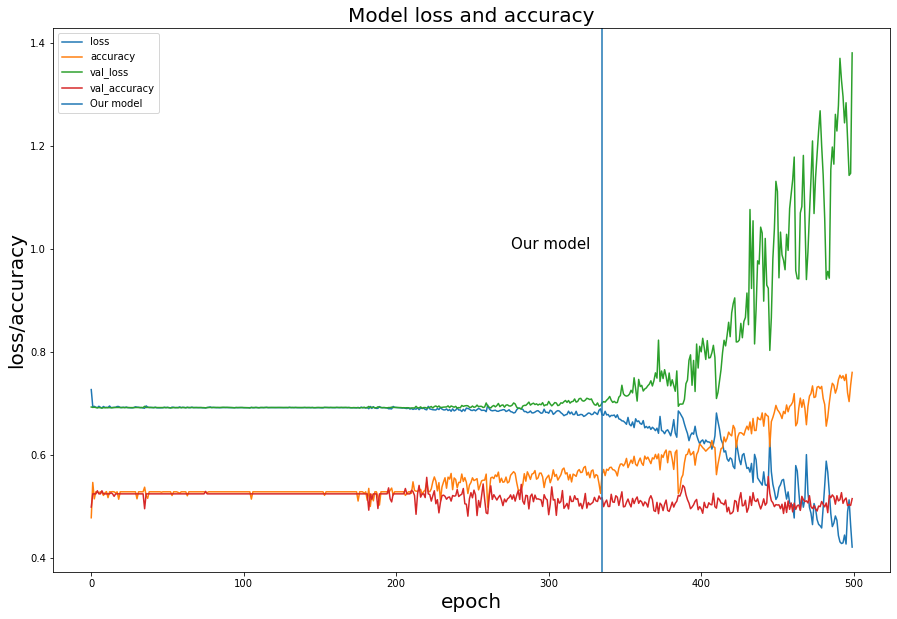

In [84]:
print(history.history.keys())
plt.figure(figsize=(15, 10))
fig = plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['accuracy'], label="accuracy")
plt.plot(history.history['val_loss'], label="val_loss")
plt.plot(history.history['val_accuracy'],label="val_accuracy")
plt.title("Model loss and accuracy", fontsize="20")
plt.xlabel("epoch", fontsize="20")
plt.ylabel("loss/accuracy", fontsize="20")
plt.axvline(335, label="Our model")
plt.text(275,1,'Our model', fontsize = 15)
plt.legend()
plt.show()

In [62]:
### Save train ###

y_train_preds_intervals = model.predict_classes(x_train_tm)
y_train_preds           = []
for pred_interval in y_train_preds_intervals:
    p0 = 0
    p1 = 0
    for pred in pred_interval:
        if pred == 0:
            p0 = p0 + 1
        elif pred == 1:
            p1 = p1 + 1
        else:
            print("Error!!")
            break
    if p1 >= p0:
        y_train_preds.append(1)
    else:
        y_train_preds.append(0)

train_preds = pd.DataFrame({ticket : y_train_preds}, index = train_date)
print(train_preds.value_counts())
train_preds.to_csv("train_signal_" + ticket + ".csv", index=True)


### Save test ### 

y_test_preds_intervals = model.predict_classes(x_test_tm)
y_test_preds           = []
for pred_interval in y_test_preds_intervals:
    p0 = 0
    p1 = 0
    for pred in pred_interval:
        if pred == 0:
            p0 = p0 + 1
        elif pred == 1:
            p1 = p1 + 1
        else:
            print("Error!!")
            break
    if p1 >= p0:
        y_test_preds.append(1)
    else:
        y_test_preds.append(0)

test_preds = pd.DataFrame({ticket : y_test_preds}, index = test_date)
print(test_preds.value_counts())
test_preds.to_csv("test_signal_" + ticket + ".csv", index=True)

/Users/nicolabini/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


VUZI
0       358
1       306
dtype: int64
VUZI
0       415
1       329
dtype: int64
